<a href="https://colab.research.google.com/github/caryjim/PIAAC-Exploratory-Cluster-Analysis/blob/master/PIAAC_Cluster_Analysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os   # Assign the folder as current directory 
os.chdir('/content/drive/My Drive/Colab Notebooks/PIAAC Data')

# Title: Exploratory Cluster Analysis of U.S. Adults Characteristics in PIAAC data
Authors: Cary K. Jim - University of North Texas & Omar Aljawfi - Jackson State University
##### AERA Satellite Conference on Educational Data Science (Sept 18, 2020) at [Stanford Institute for Research in the Social Sciences](https://iriss.stanford.edu/css/conferences/conference-educational-data-science) , Stanford University, Stanford, CA

Data Source: Program for the International Assessment of Adult Competencies 2012/2014, [U.S National Supplement Public Use Data Files - Household](https://nces.ed.gov/pubsearch/pubsinfo.asp?pubid=2016667REV),
File Name: 2016667REV_spss.zip

## 1.Import Data and Conduct Descriptive Statistics 

In [ ]:
!pip install pyreadstat

In [ ]:
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns

# Color Palettes for Seaborn: https://seaborn.pydata.org/tutorial/color_palettes.html
# Color Maps for Matplotlib: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
raw, meta = pyreadstat.read_sav('prgushp1_puf.sav')
raw.info()
raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8670 entries, 0 to 8669
Columns: 1340 entries, CNTRYID to EARNMTHSELFPPPUS_C
dtypes: float64(1318), object(22)
memory usage: 88.6+ MB


,CNTRYID,CNTRY,CNTRYID_E,CNTRY_E,SEQID,GENDER_R,DISP_CIBQ,A_N01_T,B_Q01A,B_Q01A_T,B_Q01B,B_Q01C1_C,B_D01D_C,B_Q02A,B_Q02A_T1,B_Q02A_T2,B_Q03A,B_Q03C1_C,B_D03D_C,B_Q04A,B_Q04B_C,B_Q05C,B_Q05C_T,B_Q10A,B_Q10B,B_Q10C,B_Q11,B_Q12A,B_Q12A_T,B_Q12C,B_Q12D_C,B_Q12E,B_Q12F_C,B_Q12G,B_Q12H_C,B_D12H,B_Q13,B_Q14A,B_Q14B,B_Q15A,...,ICTHOME,ICTHOME_WLE_CA,ICTWORK,ICTWORK_WLE_CA,INFLUENCE,INFLUENCE_WLE_CA,NUMHOME,NUMHOME_WLE_CA,NUMWORK,NUMWORK_WLE_CA,PLANNING,PLANNING_WLE_CA,READHOME,READHOME_WLE_CA,READWORK,READWORK_WLE_CA,TASKDISC,TASKDISC_WLE_CA,WRITHOME,WRITHOME_WLE_CA,WRITWORK,WRITWORK_WLE_CA,EARNHRDCL,EARNHRBONUSDCL,EARNMTHALLDCL,EARNFLAG,D_Q18A_T,PAIDWORK5,EMPSTAT,EARNHRUS_C,EARNHRPPPUS_C,EARNHRBONUSUS_C,EARNHRBONUSPPPUS_C,EARNMTHUS_C,EARNMTHPPPUS_C,EARNMTHBONUSUS_C,EARNMTHBONUSPPPUS_C,EARNMTHALLUS_C,EARNMTHALLPPPUS_C,EARNMTHSELFPPPUS_C
0,84091.0,USA,840.0,USA,1.0,2.0,1.0,2.0,7.0,2.0,NaN,2.0,NaN,2.0,1.0,1.0,1.0,5.0,1.0,NaN,NaN,2.0,2.0,1.0,4.0,1.0,3.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.528612,2.0,1.124303,1.0,1.036985,1.0,0.819297,1.0,2.173975,3.0,1.958829,3.0,3.088914,5.0,1.070335,2.0,2.326391,4.0,1.0,1.0,4.0,1.0,2.0,1.0,2.0,6.936416,6.936416,6.936416,6.936416,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,NaN
1,84091.0,USA,840.0,USA,2.0,2.0,1.0,2.0,7.0,2.0,NaN,2.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.193614,3.0,NaN,NaN,NaN,NaN,2.608917,4.0,NaN,NaN,NaN,NaN,1.033728,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84091.0,USA,840.0,USA,3.0,1.0,1.0,1.0,12.0,3.0,4.0,3.0,NaN,2.0,1.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,1.0,3.0,2.0,NaN,2.0,3.0,1.0,NaN,1.0,...,2.727385,4.0,3.564468,5.0,3.480417,5.0,3.393321,5.0,4.361635,5.0,3.734814,5.0,3.047967,5.0,2.780542,5.0,2.716861,5.0,2.857830,5.0,3.690521,5.0,9.0,9.0,10.0,1.0,5.0,1.0,2.0,35.733053,35.733053,39.229557,39.229557,8500.000000,8500.000000,9333.333333,9333.333333,9333.333333,9333.333333,NaN
3,84091.0,USA,840.0,USA,4.0,2.0,1.0,2.0,12.0,3.0,4.0,3.0,NaN,2.0,1.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,1.0,1.0,2.0,NaN,2.0,3.0,1.0,NaN,1.0,...,2.832901,5.0,3.308333,5.0,2.367685,4.0,1.138663,1.0,2.027366,3.0,3.010131,4.0,2.499774,4.0,2.234478,3.0,1.370868,2.0,2.438870,3.0,1.741687,3.0,8.0,8.0,8.0,1.0,4.0,1.0,2.0,27.403846,27.403846,27.403846,27.403846,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,NaN
4,84091.0,USA,840.0,USA,5.0,2.0,1.0,2.0,7.0,2.0,8.0,2.0,NaN,2.0,1.0,1.0,1.0,4.0,1.0,NaN,NaN,1.0,1.0,1.0,3.0,4.0,2.0,2.0,1.0,2.0,NaN,1.0,1.0,2.0,NaN,1.0,NaN,1.0,NaN,1.0,...,1.621030,2.0,1.153672,2.0,2.269413,4.0,2.803284,4.0,1.848566,3.0,1.958027,4.0,2.802664,5.0,2.154052,3.0,1.466427,2.0,1.070335,2.0,0.762984,1.0,2.0,2.0,3.0,1.0,2.0,1.0,2.0,8.500000,8.500000,8.651822,8.651822,1399.666667,1399.666667,1424.666667,1424.666667,1424.666667,1424.666667,NaN


### 1.1 Create Dataframes based on Desired Variables 
- Background variables (bkg), literacy scores (lit), numeracy scores (num), and problem solving in technology-rich environment scores (psl)

In [ ]:
bkg = raw[["SEQID", "GENDER_R", "B_Q01A", "C_D05", "WRITHOME", "WRITWORK", "READHOME", "READWORK", "NUMHOME", "NUMWORK", "ICTHOME", "ICTWORK"]]
lit = raw[['SEQID', 'PVLIT1', 'PVLIT2', 'PVLIT3', 'PVLIT4', 'PVLIT5', 'PVLIT6', 'PVLIT7', 'PVLIT8', 'PVLIT9', 'PVLIT10']]
num = raw[['SEQID', 'PVNUM1', 'PVNUM2', 'PVNUM3', 'PVNUM4', 'PVNUM5', 'PVNUM6', 'PVNUM7', 'PVNUM8', 'PVNUM9', 'PVNUM10']]
psl = raw[['SEQID', 'PVPSL1', 'PVPSL2', 'PVPSL3', 'PVPSL4', 'PVPSL5', 'PVPSL6', 'PVPSL7', 'PVPSL8', 'PVPSL9', 'PVPSL10']]

In [ ]:
# Check Data types and count of non-null values in background variables
bkg.info()

# Descriptive Statistics of the background variables (demographics and indexes)
bkg.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8670 entries, 0 to 8669
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQID     8670 non-null   float64
 1   GENDER_R  8670 non-null   float64
 2   B_Q01A    8472 non-null   float64
 3   C_D05     8481 non-null   float64
 4   WRITHOME  7710 non-null   float64
 5   WRITWORK  5062 non-null   float64
 6   READHOME  8391 non-null   float64
 7   READWORK  5830 non-null   float64
 8   NUMHOME   8043 non-null   float64
 9   NUMWORK   4998 non-null   float64
 10  ICTHOME   6727 non-null   float64
 11  ICTWORK   4055 non-null   float64
dtypes: float64(12)
memory usage: 812.9 KB


,SEQID,GENDER_R,B_Q01A,C_D05,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK
count,8670.00000,8670.00000,8472.000000,8481.000000,7710.000000,5062.000000,8391.000000,5830.000000,8043.000000,4998.000000,6727.000000,4055.000000
mean,4335.50000,1.53737,8.139164,1.650631,2.270523,2.124228,2.485213,2.091360,2.338422,2.170494,2.195658,2.043740
std,2502.95775,0.49863,3.249709,0.840865,0.996733,1.105181,0.970266,1.035053,0.970218,1.018536,0.952560,1.123017
min,1.00000,1.00000,1.000000,1.000000,-0.296028,0.056130,-1.298560,-0.955525,-0.508282,-0.090201,-1.209048,0.008985
25%,2168.25000,1.00000,7.000000,1.000000,1.685187,1.266214,1.966560,1.467136,1.775165,1.546843,1.584503,1.140281
50%,4335.50000,2.00000,7.000000,1.000000,2.529546,2.069479,2.513509,2.057090,2.401710,2.114623,2.229498,1.854941
75%,6502.75000,2.00000,12.000000,2.000000,2.890370,2.815120,3.001590,2.665369,2.953526,2.795181,2.807829,2.768948
max,8670.00000,2.00000,15.000000,4.000000,6.104219,5.799807,7.427246,7.020838,6.173661,6.049904,7.710159,5.463352


Variables: 
- Participant ID : SEQID
- Demographic Information:
 - Gender (GENDER_R) 1.0 - Male, 2.0 - Female
 - Highest Education Levels Completed (B_Q01A)
    - ISCED Levels for US Data coded as:
      - 2: Grade 1-6; 3: Grade 7-9; 7: High School Diploma; 9: Cert. from trade school;
    11: Associate Degree; 12: Bachelor Degree; 13: Master Degree/Prof. Degree; 14: Doctorate Degree; 15: Foreign Qual.
- Employment Status (C_D05):
    - 1.0 - Employed, 2.0 - Unemployed, 3.0 - Out of Labor Force, 4.0 - Not Known: 4

There are standardized scales scores for skills use derived from items in background survey
- Index of Reading Skills at Home or at Work (Non-nested scales)
    - READHOME, READWORK: literacy skills for both document and prose type texts
- Index of Writing Skills at Home or at Work (Non-nested scales)
    - WRITHOME, WRITWORK: writing skills such as writing letters, mails, articles, reports or fill in forms
- Index of Numeracy Skills at Home or at Work (Non-nested scales)
    - NUMHOME, NUMWORK: Numeracy activities such as calculation, prepare graphs/charts, use formulas, or advanced math
- Index of ICT Skills at Home or at Work
    - ICTHOME, ICTWORK: Literacy(Digital Reading), using of computers and internet for various tasks (mail, documents)

There are cognitive assessment scale scores for literacy test, numeracy test, and problem solving test
- Literacy - plausible values: PVLIT1 to PVLIT10
- Numeracy - plausible values: PVNUM1 to PVNUM10
- Problem Solving in Technology Rich Environment: PVPSL1 to PVPSL10

View [PIAAC Technical Report](https://www.oecd.org/skills/piaac/_Technical%20Report_17OCT13.pdf) for more information.

In [ ]:
# Descriptive summary of the cognitive assessment scores
lit.describe()  # Literacy - Plausible Values 1 to 10

,SEQID,PVLIT1,PVLIT2,PVLIT3,PVLIT4,PVLIT5,PVLIT6,PVLIT7,PVLIT8,PVLIT9,PVLIT10
count,8670.00000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000
mean,4335.50000,268.234316,267.440277,267.522442,268.208992,266.962657,267.825631,267.078918,267.119469,267.806133,267.619708
std,2502.95775,49.704244,50.115953,49.856400,49.017402,49.259714,49.216238,49.151840,49.748104,49.622385,49.142669
min,1.00000,86.651590,43.048510,61.836530,95.636320,67.615800,39.714050,75.403480,66.479190,76.431130,76.603430
25%,2168.25000,235.147435,235.515340,235.539062,236.153347,234.526765,235.803960,235.340735,235.581475,235.615060,235.797470
50%,4335.50000,270.675820,269.051255,269.701260,270.696215,269.507930,270.189850,269.058260,269.963195,270.177725,269.978455
75%,6502.75000,302.876422,302.733227,302.722860,303.366863,301.667280,302.940445,302.161788,302.198208,302.543465,302.395715
max,8670.00000,449.728540,429.630930,418.506410,429.957510,434.267650,425.012480,448.654210,425.984230,447.550240,430.914220


In [ ]:
num.describe() # Numeracy - Plausible Values 1 to 10

,SEQID,PVNUM1,PVNUM2,PVNUM3,PVNUM4,PVNUM5,PVNUM6,PVNUM7,PVNUM8,PVNUM9,PVNUM10
count,8670.00000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000
mean,4335.50000,250.658181,250.347327,250.859622,250.540273,250.674604,250.614700,250.177249,250.680210,251.011795,250.352481
std,2502.95775,55.232396,55.352840,55.232801,55.185118,55.421080,54.909609,54.645748,54.534229,55.110599,54.782785
min,1.00000,65.125630,39.685360,70.138420,57.178880,42.824420,52.265800,44.329880,0.000000,20.759150,67.637440
25%,2168.25000,213.004847,213.090975,212.886025,212.758810,212.465248,213.579345,213.320932,214.463908,213.780172,213.076932
50%,4335.50000,252.400340,251.511730,252.346955,252.171220,251.942045,251.857340,252.137650,252.819695,252.238135,252.457925
75%,6502.75000,289.240948,289.593977,289.985275,290.124220,289.905368,289.286637,288.989475,289.262680,289.758780,289.193270
max,8670.00000,432.065500,438.637120,425.680560,429.042820,439.683620,436.090730,458.283340,424.231170,431.294160,445.026710


In [ ]:
psl.describe() # Problem solving in technology rich environment - Plausible Values 1 to 10

,SEQID,PVPSL1,PVPSL2,PVPSL3,PVPSL4,PVPSL5,PVPSL6,PVPSL7,PVPSL8,PVPSL9,PVPSL10
count,8670.00000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000
mean,4335.50000,270.044363,271.136284,270.677889,271.326889,270.625032,269.947968,270.418439,269.603266,270.519454,271.071166
std,2502.95775,43.695871,43.103283,44.083169,43.047290,44.592127,43.650461,44.087065,43.538690,43.672084,44.297676
min,1.00000,93.901960,77.725340,78.272050,85.743230,98.634700,97.854190,111.257080,70.652630,93.875140,60.376480
25%,2168.25000,240.758285,242.371502,241.426547,242.945370,241.143395,240.739575,241.471203,241.522257,242.384753,241.616070
50%,4335.50000,271.394585,272.471365,272.622075,273.224335,272.353225,271.826910,272.113845,271.014175,272.754225,272.846175
75%,6502.75000,301.395245,301.482678,301.165530,301.841212,301.936580,299.749205,300.658420,300.059818,299.882810,302.202750
max,8670.00000,416.480890,411.553950,432.251900,417.470300,425.947830,406.538320,415.394260,422.794390,440.362460,404.367850


### 1.2 Visualization and Descriptive Statistics

#### 1.2.1 Frequency Plots of Gender, Education Level, and Employment Status

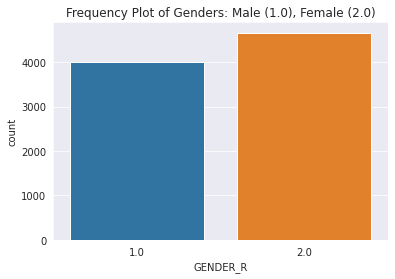

In [ ]:
# Drop Sequence ID for Plotting
df = bkg.drop("SEQID", axis = 1)

# Countplot of Genders
sns.set_style("darkgrid")
sns.countplot(x = 'GENDER_R', data = df)
plt.title("Frequency Plot of Genders: Male (1.0), Female (2.0)")
plt.show()

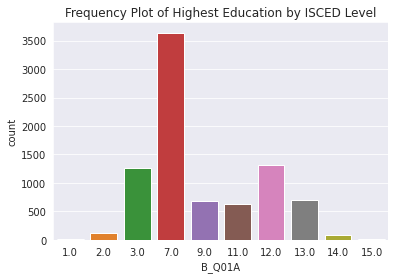

In [ ]:
# Countplot of Education Levels
sns.set_style("darkgrid")
sns.countplot(x = 'B_Q01A', data = df)
plt.title("Frequency Plot of Highest Education by ISCED Level")
plt.show()

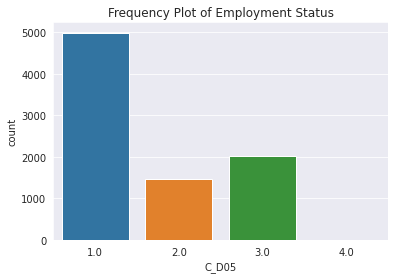

1.0    4992
3.0    2019
2.0    1465
4.0       5
Name: C_D05, dtype: int64

In [ ]:
# Countplot of Employment Status
sns.set_style("darkgrid")
sns.countplot(x = 'C_D05', data = df)
plt.title("Frequency Plot of Employment Status")
plt.show()
bkg.C_D05.value_counts() # There are 5 counts in 4

#### 1.2.2 Distribution of Index Variables

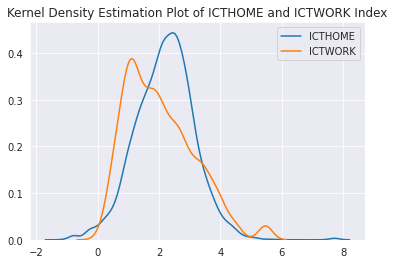

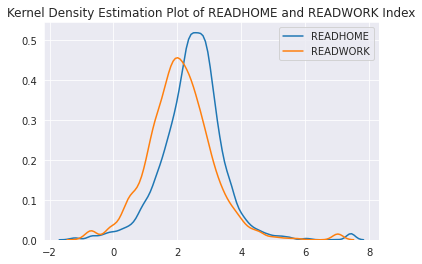

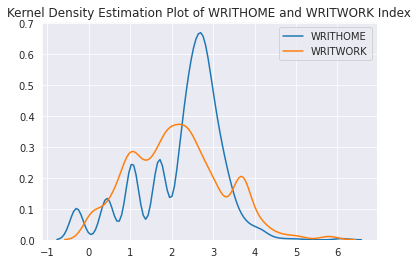

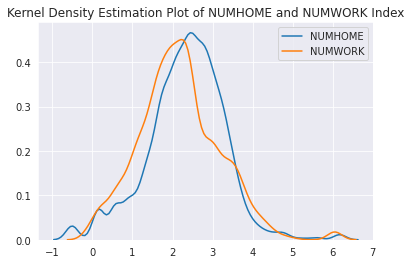

In [ ]:
# Plotting Index variables
# KDE plot of ICT skills used at home and at work
sns.kdeplot(df.ICTHOME, kernel="gau", label = "ICTHOME")
sns.kdeplot(df.ICTWORK, kernel= "gau", label = "ICTWORK")
plt.title("Kernel Density Estimation Plot of ICTHOME and ICTWORK Index")
plt.legend()
plt.show()

# KDE plot of Reading skills used at home and at work
sns.kdeplot(df.READHOME, kernel="gau", label = "READHOME")
sns.kdeplot(df.READWORK, kernel= "gau", label = "READWORK")
plt.title("Kernel Density Estimation Plot of READHOME and READWORK Index")
plt.legend()
plt.show()

# KDE plot of Writing skills used at home and at work
sns.kdeplot(df.WRITHOME, kernel="gau", label = "WRITHOME")
sns.kdeplot(df.WRITWORK, kernel= "gau", label = "WRITWORK")
plt.title("Kernel Density Estimation Plot of WRITHOME and WRITWORK Index")
plt.legend()
plt.show()

# KDE plot of Numeracy skills used at home and at work
sns.kdeplot(df.NUMHOME, kernel="gau", label = "NUMHOME")
sns.kdeplot(df.NUMWORK, kernel= "gau", label = "NUMWORK")
plt.title("Kernel Density Estimation Plot of NUMHOME and NUMWORK Index")
plt.legend()
plt.show()


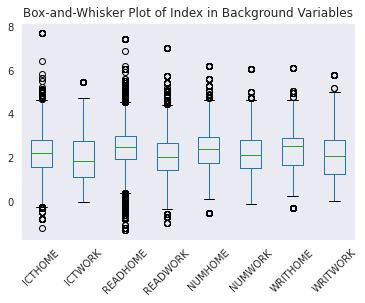

In [ ]:
# Box and Whisker plot of the indexes
df.boxplot(column=['ICTHOME', "ICTWORK", "READHOME", "READWORK", "NUMHOME", "NUMWORK", "WRITHOME", "WRITWORK"],
           grid = False, rot= 45, fontsize = 10)  # (pandas boxplot)
plt.title("Box-and-Whisker Plot of Index in Background Variables")
plt.show()


#### 1.3 Correlation


In [ ]:
# Correlation of background variables with Pearson R method
corr_df = df.corr(method="pearson")
corr_df

,GENDER_R,B_Q01A,C_D05,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK
GENDER_R,1.000000,0.046215,0.080050,0.050886,0.000180,0.007946,-0.026043,-0.059711,-0.108474,0.005980,-0.043789
B_Q01A,0.046215,1.000000,-0.231493,0.091541,0.279311,0.245181,0.404480,0.052778,0.177037,0.252518,0.335218
C_D05,0.080050,-0.231493,1.000000,0.014308,-0.105513,-0.016707,-0.159050,0.005501,-0.070115,-0.048841,-0.116608
WRITHOME,0.050886,0.091541,0.014308,1.000000,0.167154,0.453370,0.178088,0.457523,0.140501,0.459261,0.162731
WRITWORK,0.000180,0.279311,-0.105513,0.167154,1.000000,0.206392,0.518228,0.105220,0.327361,0.225473,0.471824
READHOME,0.007946,0.245181,-0.016707,0.453370,0.206392,1.000000,0.384319,0.498335,0.232290,0.484372,0.190928
READWORK,-0.026043,0.404480,-0.159050,0.178088,0.518228,0.384319,1.000000,0.156396,0.395416,0.260762,0.476794
NUMHOME,-0.059711,0.052778,0.005501,0.457523,0.105220,0.498335,0.156396,1.000000,0.304706,0.458550,0.138866
NUMWORK,-0.108474,0.177037,-0.070115,0.140501,0.327361,0.232290,0.395416,0.304706,1.000000,0.192681,0.364759
ICTHOME,0.005980,0.252518,-0.048841,0.459261,0.225473,0.484372,0.260762,0.458550,0.192681,1.000000,0.384008


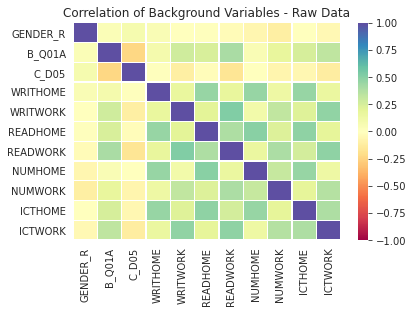

In [ ]:
# Viz of correlation table of background variables

sns.heatmap(corr_df, vmin=-1, vmax=1, cmap="Spectral", linewidths=0.25)
plt.title("Correlation of Background Variables - Raw Data")
plt.show()

#### 1.4 Box-and-Wishker Plot of Cognitive Assessment Items (lit, num, psl)
see Section 1.1 for descriptive statistics of each set of scores 

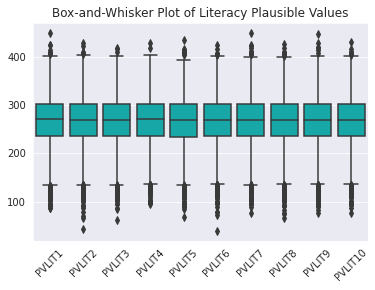

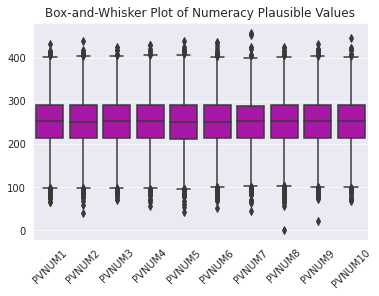

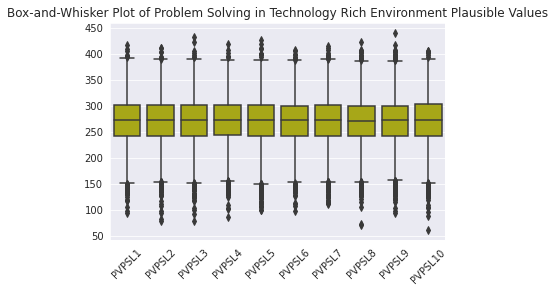

In [ ]:
# Box and Whisker plot of numeracy, literacy and problem-solivng plausible values
litplot = lit.drop("SEQID", axis = 1)
sns.boxplot(data=litplot, color = "c")
plt.xticks(rotation = 45)
plt.title("Box-and-Whisker Plot of Literacy Plausible Values")
plt.show()

numplot = num.drop("SEQID", axis = 1)
sns.boxplot(data=numplot, color = "m")
plt.xticks(rotation = 45)
plt.title("Box-and-Whisker Plot of Numeracy Plausible Values")
plt.show()

pslplot = psl.drop("SEQID", axis = 1)
sns.boxplot(data=pslplot, color = "y")
plt.xticks(rotation = 45)
plt.title("Box-and-Whisker Plot of Problem Solving in Technology Rich Environment Plausible Values")
plt.show()

## 2. Data Cleaning and Creation of Subset Dataframes

After reviewing the [PIAAC Household Sample Codebook](https://nces.ed.gov/pubs2016/data/2016667REV_codebook.pdf),
most of the missing values are determined to be skipped responses (survey skip logic) or non-responses.
For example: WRITWORK_Categorized has 2286 valid skip response, 177 not stated response, and 1145 zero responses. 
Since we are using the continuous version of WRITWORK, the total missing value is 3608.

This analysis is not inferential in nature, we are looking at participants
who responded to the survey items and have a valid scores for the cognitive assessments. Futher reading of missing data in cluser analysis can be found in Everitt, Landau, & Leese (2001).

### 2.1 Merge Dataframes of bkg, lit, num, and psl

In [ ]:
# Merge dataframes by the Participant ID (SEQID)
data = pd.merge(bkg, lit, on ='SEQID')
data = pd.merge(data, num, on = 'SEQID')
data = pd.merge(data, psl, on = 'SEQID')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8670 entries, 0 to 8669
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQID     8670 non-null   float64
 1   GENDER_R  8670 non-null   float64
 2   B_Q01A    8472 non-null   float64
 3   C_D05     8481 non-null   float64
 4   WRITHOME  7710 non-null   float64
 5   WRITWORK  5062 non-null   float64
 6   READHOME  8391 non-null   float64
 7   READWORK  5830 non-null   float64
 8   NUMHOME   8043 non-null   float64
 9   NUMWORK   4998 non-null   float64
 10  ICTHOME   6727 non-null   float64
 11  ICTWORK   4055 non-null   float64
 12  PVLIT1    8488 non-null   float64
 13  PVLIT2    8488 non-null   float64
 14  PVLIT3    8488 non-null   float64
 15  PVLIT4    8488 non-null   float64
 16  PVLIT5    8488 non-null   float64
 17  PVLIT6    8488 non-null   float64
 18  PVLIT7    8488 non-null   float64
 19  PVLIT8    8488 non-null   float64
 20  PVLIT9    8488 non-null   floa

In [ ]:
# Listwise deletion is used to remove participants and reset index after removing null values
data_cleaned = data.dropna(how='any', inplace=False).reset_index(drop=True)
data_cleaned.isnull().sum()

data_cleaned.describe()

,SEQID,GENDER_R,B_Q01A,C_D05,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK,PVLIT1,PVLIT2,PVLIT3,PVLIT4,PVLIT5,PVLIT6,PVLIT7,PVLIT8,PVLIT9,PVLIT10,PVNUM1,PVNUM2,PVNUM3,PVNUM4,PVNUM5,PVNUM6,PVNUM7,PVNUM8,PVNUM9,PVNUM10,PVPSL1,PVPSL2,PVPSL3,PVPSL4,PVPSL5,PVPSL6,PVPSL7,PVPSL8,PVPSL9,PVPSL10
count,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000
mean,4334.273916,1.548469,9.959821,1.181760,2.446510,2.404889,2.747030,2.518369,2.484278,2.349938,2.415126,2.207846,295.238072,294.504447,294.086811,294.501427,293.003098,293.800281,293.390208,294.008966,294.068148,293.351561,279.675366,279.950478,280.468473,279.143220,279.573205,279.348508,278.749580,279.257964,280.343354,278.854036,284.768627,285.350570,286.296833,286.133831,286.385484,285.166504,285.820931,284.752257,285.001028,286.123769
std,2509.316193,0.497725,2.769562,0.494434,0.846354,1.023700,0.771407,0.885965,0.790009,1.018320,0.832227,1.108656,40.847302,41.111285,40.892109,40.648230,40.595781,40.526041,40.546748,40.509493,41.083303,40.691745,47.936786,47.521127,47.287612,47.718376,48.296738,48.188308,46.963478,46.958215,47.933368,47.183059,40.718743,39.867649,40.663826,39.501509,41.038485,40.487172,40.647398,39.841806,40.421018,40.828304
min,3.000000,1.000000,2.000000,1.000000,-0.296028,0.056130,-0.304634,-0.558478,-0.508282,-0.090201,-0.776912,0.008985,135.991680,115.844760,94.211990,143.201740,129.202900,110.428120,136.801100,152.978380,137.866270,124.938500,65.125630,66.852180,89.417580,101.459550,82.521710,102.570390,44.329880,0.000000,20.759150,90.738710,93.901960,96.886840,103.530900,136.088150,98.634700,107.160990,112.452600,126.266830,121.151780,60.376480
25%,2138.000000,1.000000,7.000000,1.000000,2.222770,1.741687,2.292098,1.970145,2.042943,1.700547,1.880038,1.308159,268.646183,267.110302,267.678455,268.776737,266.994830,267.138362,267.008540,267.404012,267.462170,266.855685,248.228625,248.298667,250.134465,247.868735,248.092455,248.254480,249.257332,247.932065,250.401657,247.442710,258.350765,259.706852,260.760960,261.487040,260.286873,258.583540,259.775723,258.882313,259.539700,261.332758
50%,4374.500000,2.000000,11.000000,1.000000,2.628199,2.332981,2.690924,2.431995,2.504262,2.294747,2.418279,2.068596,296.731830,296.565650,296.263915,296.407030,294.893795,296.009975,295.204870,295.935415,295.886530,295.415175,281.880245,281.999590,282.344760,282.157770,281.963625,281.833495,279.846890,280.944825,282.242450,280.728715,287.323270,286.834370,288.096190,287.875275,288.129770,286.864970,288.614455,286.788925,286.679965,288.440770
75%,6505.500000,2.000000,12.000000,1.000000,2.918247,2.985413,3.091591,2.941596,2.969251,3.004826,2.913816,2.933784,324.170115,322.983657,322.251283,322.818728,321.237755,322.114058,320.945190,322.489820,322.828422,321.856525,312.773867,312.289873,313.203477,311.827367,313.271832,312.311028,311.242285,311.873935,313.879507,312.093238,313.064338,313.118800,314.884847,313.402983,314.651060,313.091180,313.226290,312.181312,312.453533,314.513942
max,8668.000000,2.000000,15.000000,3.000000,6.104219,5.799807,7.427246,7.020838,6.173661,6.049904,7.710159,5.463352,449.728540,429.630930,418.506410,429.957510,434.267650,425.012480,448.654210,425.984230,447.550240,430.914220,432.065500,438.637120,425.680560,429.042820,439.683620,436.090730,458.283340,424.231170,431.294160,445.026710,416.480890,411.553950,432.251900,417.470300,425.947830,406.538320,411.400860,422.794390,440.362460,404.367850


In [ ]:
data_cleaned.head()

,SEQID,GENDER_R,B_Q01A,C_D05,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK,PVLIT1,PVLIT2,PVLIT3,PVLIT4,PVLIT5,PVLIT6,PVLIT7,PVLIT8,PVLIT9,PVLIT10,PVNUM1,PVNUM2,PVNUM3,PVNUM4,PVNUM5,PVNUM6,PVNUM7,PVNUM8,PVNUM9,PVNUM10,PVPSL1,PVPSL2,PVPSL3,PVPSL4,PVPSL5,PVPSL6,PVPSL7,PVPSL8,PVPSL9,PVPSL10
0,3.0,1.0,12.0,1.0,2.857830,3.690521,3.047967,2.780542,3.393321,4.361635,2.727385,3.564468,349.81872,346.28760,330.73240,278.23792,327.48548,362.36081,271.53633,350.56066,364.33575,322.09916,354.55827,331.13920,359.91198,326.94124,355.71689,362.47545,299.25932,364.43998,378.52308,327.03974,301.55177,288.45475,289.30603,271.61450,283.15242,303.35927,271.70131,290.11247,320.23915,284.82614
1,4.0,2.0,12.0,1.0,2.438870,1.741687,2.499774,2.234478,1.138663,2.027366,2.832901,3.308333,311.97580,333.80007,346.11162,351.24638,328.66602,388.05970,326.75586,350.29069,368.53784,341.61278,327.27665,337.01325,325.27632,358.91713,290.63060,380.61383,325.01897,353.37299,347.79402,348.56236,318.86517,335.71306,328.44125,318.93160,330.29128,351.31326,322.81609,359.94806,321.08724,342.75098
2,5.0,2.0,7.0,1.0,1.070335,0.762984,2.802664,2.154052,2.803284,1.848566,1.621030,1.153672,350.91657,286.53332,293.47318,310.50597,299.38403,294.27376,314.14011,309.38609,291.62154,281.58717,285.83613,308.74445,309.02457,305.58945,315.07096,284.79936,303.60327,286.46194,274.41386,287.10434,324.68964,302.02831,287.01258,317.24939,300.53521,310.77074,295.60636,294.55197,268.06415,279.62886
3,8.0,1.0,7.0,1.0,-0.296028,2.985413,2.586127,2.032384,1.280105,2.206776,1.444296,3.440305,234.26233,240.92852,232.55642,240.97180,237.46359,246.02384,256.84294,208.66588,222.23858,223.66660,229.90842,221.82773,223.06117,216.20949,246.49719,234.80651,229.48414,206.52143,220.15503,210.38608,245.47580,273.78606,270.34926,239.25069,235.86421,247.83397,268.99228,233.89101,228.79400,222.38680
4,9.0,2.0,3.0,1.0,3.346961,2.847573,3.037285,2.169962,3.266308,0.582710,2.315158,1.316129,221.32517,233.22331,238.33483,219.29122,214.33477,227.57778,216.53093,233.11585,212.39568,187.66165,195.09625,190.21328,215.29848,179.64235,193.62778,204.11288,191.13633,211.91665,189.64415,164.53685,242.62990,239.00164,289.27029,244.47049,255.81996,240.44746,254.75295,245.23307,244.78131,240.25771


### 2.2 Visualization and Descriptive Statistics 
 We plotted the charts again to view any drastic change to the variables in the dataset

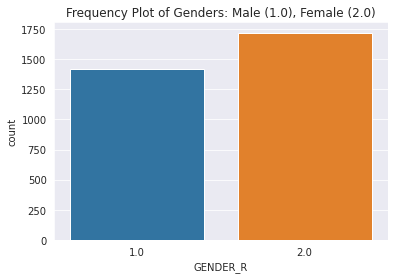

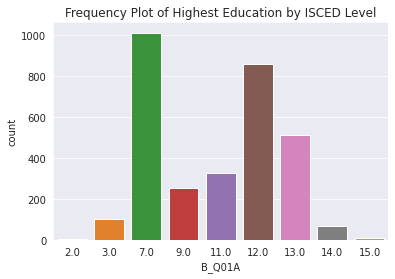

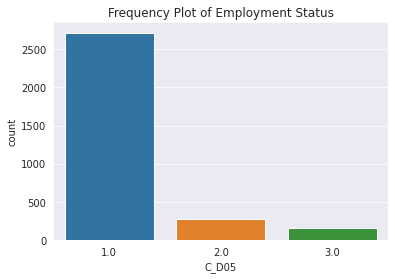

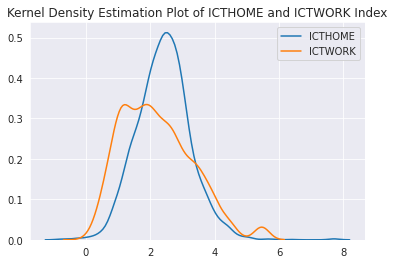

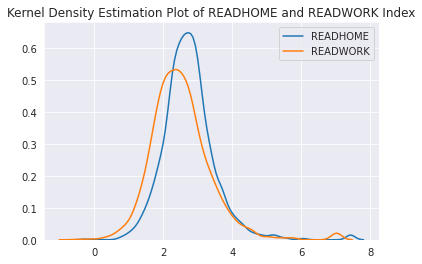

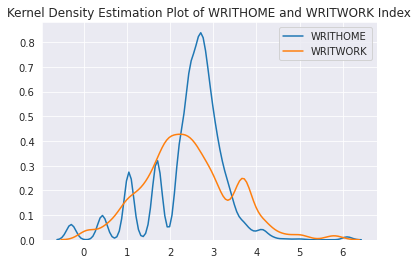

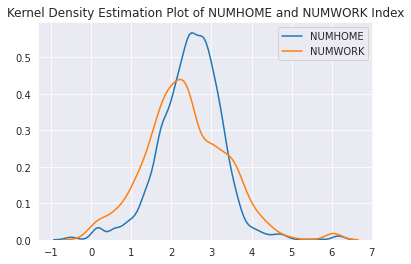

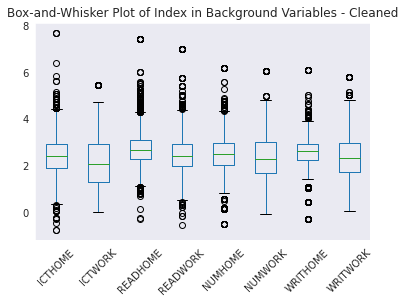

In [ ]:
# Drop Sequence ID for Plotting
df2 = data_cleaned.drop("SEQID", axis = 1)

# Countplot of Genders
sns.set_style("darkgrid")
sns.countplot(x = 'GENDER_R', data = df2)
plt.title("Frequency Plot of Genders: Male (1.0), Female (2.0)")
plt.show()
# Countplot of Education Levels
sns.set_style("darkgrid")
sns.countplot(x = 'B_Q01A', data = df2)
plt.title("Frequency Plot of Highest Education by ISCED Level")
plt.show()

# Countplot of Employment Status
sns.set_style("darkgrid")
sns.countplot(x = 'C_D05', data = df2)
plt.title("Frequency Plot of Employment Status")
plt.show()
bkg.C_D05.value_counts() # There are 5 counts in 4


# Plotting Index variables
# KDE plot of ICT skills used at home and at work
sns.kdeplot(df2.ICTHOME, kernel="gau", label = "ICTHOME")
sns.kdeplot(df2.ICTWORK, kernel= "gau", label = "ICTWORK")
plt.title("Kernel Density Estimation Plot of ICTHOME and ICTWORK Index")
plt.legend()
plt.show()

# KDE plot of Reading skills used at home and at work
sns.kdeplot(df2.READHOME, kernel="gau", label = "READHOME")
sns.kdeplot(df2.READWORK, kernel= "gau", label = "READWORK")
plt.title("Kernel Density Estimation Plot of READHOME and READWORK Index")
plt.legend()
plt.show()

# KDE plot of Writing skills used at home and at work
sns.kdeplot(df2.WRITHOME, kernel="gau", label = "WRITHOME")
sns.kdeplot(df2.WRITWORK, kernel= "gau", label = "WRITWORK")
plt.title("Kernel Density Estimation Plot of WRITHOME and WRITWORK Index")
plt.legend()
plt.show()

# KDE plot of Numeracy skills used at home and at work
sns.kdeplot(df2.NUMHOME, kernel="gau", label = "NUMHOME")
sns.kdeplot(df2.NUMWORK, kernel= "gau", label = "NUMWORK")
plt.title("Kernel Density Estimation Plot of NUMHOME and NUMWORK Index")
plt.legend()
plt.show()

# Box plot of the index (pandas boxplot)
df2.boxplot(column=['ICTHOME', "ICTWORK", "READHOME", "READWORK", "NUMHOME", "NUMWORK", "WRITHOME", "WRITWORK"],
           grid = False, rot= 45, fontsize = 10)
plt.title("Box-and-Whisker Plot of Index in Background Variables - Cleaned")
plt.show()

#### 2.2.3 Correlation

In [ ]:
# Correlation of background variables with Pearson R method
corr_df2 = df2.corr(method="pearson")
corr_df2

,GENDER_R,B_Q01A,C_D05,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK,PVLIT1,PVLIT2,PVLIT3,PVLIT4,PVLIT5,PVLIT6,PVLIT7,PVLIT8,PVLIT9,PVLIT10,PVNUM1,PVNUM2,PVNUM3,PVNUM4,PVNUM5,PVNUM6,PVNUM7,PVNUM8,PVNUM9,PVNUM10,PVPSL1,PVPSL2,PVPSL3,PVPSL4,PVPSL5,PVPSL6,PVPSL7,PVPSL8,PVPSL9,PVPSL10
GENDER_R,1.000000,0.010438,0.034183,0.054464,-0.042950,-0.067958,-0.095221,-0.094479,-0.147007,-0.048165,-0.069793,-0.060979,-0.062947,-0.050449,-0.058232,-0.064443,-0.060436,-0.047765,-0.044719,-0.043739,-0.063133,-0.203032,-0.204416,-0.205408,-0.208903,-0.211618,-0.202348,-0.202563,-0.206947,-0.203540,-0.213464,-0.070725,-0.063149,-0.072303,-0.056476,-0.051260,-0.055466,-0.055168,-0.068389,-0.079755,-0.086985
B_Q01A,0.010438,1.000000,-0.128373,0.057358,0.177383,0.070143,0.249701,0.001444,0.090023,0.215121,0.300084,0.375497,0.383391,0.368276,0.356654,0.357301,0.363241,0.363811,0.375421,0.372461,0.378505,0.390790,0.403279,0.397771,0.399421,0.394585,0.394618,0.384727,0.389478,0.395470,0.390383,0.252637,0.261534,0.251247,0.256510,0.260452,0.271289,0.261959,0.267279,0.255890,0.255411
C_D05,0.034183,-0.128373,1.000000,0.090591,-0.074652,0.078629,-0.085735,0.087017,-0.050002,0.038606,-0.094027,-0.039212,-0.045571,-0.039458,-0.053784,-0.050066,-0.040269,-0.048121,-0.058646,-0.054358,-0.043186,-0.080140,-0.079666,-0.072025,-0.076285,-0.096837,-0.089961,-0.072302,-0.081795,-0.074487,-0.093059,-0.033685,-0.056858,0.000042,-0.047908,-0.025247,-0.022486,-0.056330,-0.045911,-0.052901,-0.052983
WRITHOME,0.054464,0.057358,0.090591,1.000000,0.158254,0.446641,0.144822,0.410166,0.108314,0.457593,0.126383,0.087076,0.082127,0.085347,0.075449,0.077519,0.093801,0.090417,0.090201,0.082915,0.092975,0.065602,0.082593,0.076369,0.081964,0.079716,0.076917,0.079779,0.084813,0.083143,0.089506,0.094877,0.096842,0.099932,0.076130,0.093336,0.103413,0.098482,0.100864,0.091906,0.084572
WRITWORK,-0.042950,0.177383,-0.074652,0.158254,1.000000,0.168098,0.459776,0.076356,0.313646,0.201569,0.474266,-0.006694,0.001150,-0.019274,-0.005411,-0.004986,-0.014320,0.003257,-0.024304,-0.027038,0.015647,-0.000417,-0.001283,-0.005803,0.022930,0.010423,-0.006967,0.003152,-0.010780,0.008646,0.002931,0.023491,0.015891,0.025134,0.004369,0.031996,0.017172,0.045573,0.023464,0.014876,0.013000
READHOME,-0.067958,0.070143,0.078629,0.446641,0.168098,1.000000,0.384110,0.461031,0.187790,0.459649,0.157384,0.011176,0.007881,0.013841,-0.001515,0.007836,0.006990,0.022608,0.019544,0.020226,0.023282,0.013019,0.014310,0.034330,0.019155,0.032314,0.013532,0.017215,0.029490,0.020473,0.032698,0.007295,0.007704,0.017436,0.004087,0.021340,0.005288,0.028203,0.006067,0.018099,0.020204
READWORK,-0.095221,0.249701,-0.085735,0.144822,0.459776,0.384110,1.000000,0.128279,0.337815,0.229569,0.453170,-0.005833,-0.019796,-0.013976,-0.027086,-0.021037,-0.016528,-0.007877,-0.012553,-0.018648,0.004911,0.016228,0.014271,0.029821,0.020719,0.031516,0.008173,0.014705,0.033368,0.027099,0.027092,-0.059204,-0.057427,-0.050806,-0.052222,-0.053405,-0.042455,-0.055975,-0.045265,-0.047035,-0.037229
NUMHOME,-0.094479,0.001444,0.087017,0.410166,0.076356,0.461031,0.128279,1.000000,0.305410,0.457083,0.113527,0.122694,0.114146,0.121877,0.109913,0.111270,0.113398,0.122953,0.125441,0.105187,0.126898,0.170994,0.171421,0.187184,0.172733,0.197227,0.186677,0.185487,0.200403,0.165683,0.193655,0.178737,0.161114,0.178786,0.156270,0.182457,0.168995,0.182178,0.146751,0.175418,0.183240
NUMWORK,-0.147007,0.090023,-0.050002,0.108314,0.313646,0.187790,0.337815,0.305410,1.000000,0.174885,0.368227,0.055644,0.052993,0.048079,0.042817,0.043348,0.056492,0.044683,0.040773,0.037152,0.041697,0.120661,0.121871,0.140991,0.117678,0.134786,0.132004,0.137983,0.130369,0.130989,0.137146,0.076003,0.059156,0.044158,0.058675,0.061833,0.051714,0.070781,0.055144,0.050973,0.086211
ICTHOME,-0.048165,0.215121,0.038606,0.457593,0.201569,0.459649,0.229569,0.457083,0.174885,1.000000,0.386831,0.190505,0.185821,0.198666,0.176781,0.181059,0.187465,0.186523,0.179017,0.188164,

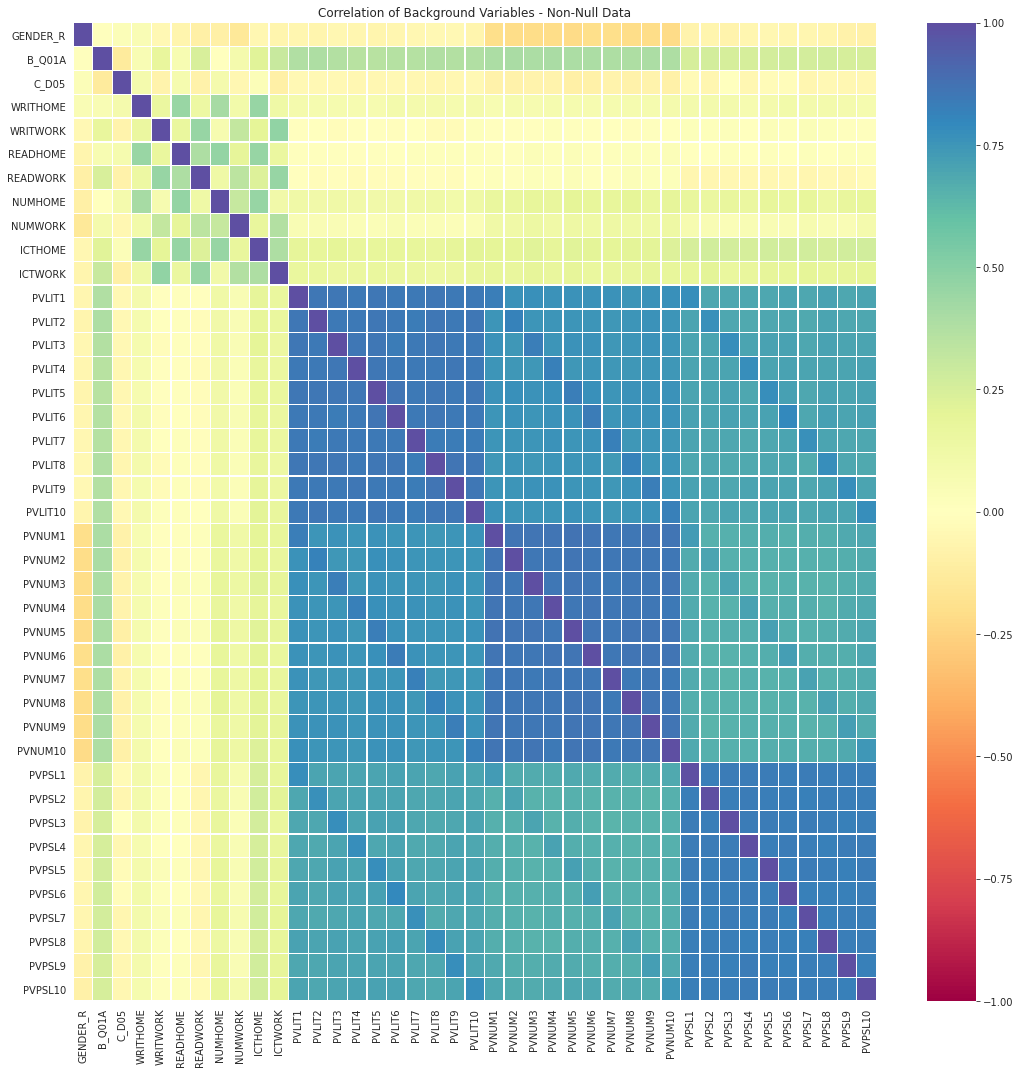

In [ ]:
# Viz of correlation table of background variables
# Color Palettes for Seaborn: https://seaborn.pydata.org/tutorial/color_palettes.html
# Color Maps for Matplotlib: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
plt.figure(figsize=(18, 18))
sns.heatmap(corr_df2, vmin=-1, vmax=1, cmap="Spectral", linewidths=0.25)
plt.title("Correlation of Background Variables - Non-Null Data")
plt.show()

### 2.2 Create subset of data for cluster analysis


Take the demographic variables together for later use

In [ ]:
bkg_set1 = data_cleaned.loc[:, ["GENDER_R", "B_Q01A", "C_D05"]]

In [ ]:
bkg_set1.head()

,GENDER_R,B_Q01A,C_D05
0,1.0,12.0,1.0
1,2.0,12.0,1.0
2,2.0,7.0,1.0
3,1.0,7.0,1.0
4,2.0,3.0,1.0


Take the index variables and add each set of plausible values of literacy, numeracy, and problem solving in technology environment.

The following is work done on data subset 1.

In [ ]:
subset1 = data_cleaned.loc[:, ["WRITHOME", "WRITWORK", "READHOME", "READWORK", "NUMHOME", "NUMWORK", "ICTHOME", "ICTWORK", "PVLIT1", "PVNUM1", "PVPSL1"]]

In [ ]:
subset1.head()

,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK,PVLIT1,PVNUM1,PVPSL1
0,2.857830,3.690521,3.047967,2.780542,3.393321,4.361635,2.727385,3.564468,349.81872,354.55827,301.55177
1,2.438870,1.741687,2.499774,2.234478,1.138663,2.027366,2.832901,3.308333,311.97580,327.27665,318.86517
2,1.070335,0.762984,2.802664,2.154052,2.803284,1.848566,1.621030,1.153672,350.91657,285.83613,324.68964
3,-0.296028,2.985413,2.586127,2.032384,1.280105,2.206776,1.444296,3.440305,234.26233,229.90842,245.47580
4,3.346961,2.847573,3.037285,2.169962,3.266308,0.582710,2.315158,1.316129,221.32517,195.09625,242.62990


## 3. Cluster Analysis

### 3.1 K-means clustering 

We utilized the CRISP - Data Mining approach and considered the kmean method used in Salvatori, Gabrielli, Giannotti, & Pedreschi (2017) study.

[Scikit-learn K-means](https://scikit-learn.org/stable/modules/clustering.html#k-means) algorithm cluster data by iertia/within cluster sum of squares. 

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn import metrics

##### 3.1.1 Model 1 with Subset 1
We assumed there are 5 clusters based on how proficiceny levels are set up in PIAAC with scores range between 0-500 for each corresponding achievement levels

In [ ]:
# Conduct kmean clustering to fit subset 1 data 
# k-means++ initialization scheme is suggested to produce more favorable results than random initialization
five_cluster = KMeans(n_clusters=5, init = 'k-means++', n_init=30, max_iter=300, random_state= 30).fit(subset1)
# Array for cluster assignment from the five cluster result
five_cluster_labels = five_cluster.labels_
# Centroids of the 5 cluster assignment
five_cluster_center = five_cluster.cluster_centers_

######  Evaluate Model 1

###### Assess the Model with [Silhouette Coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).
Silhouette coefficient "reflects the strength of a classification to the nearest crisp cluster compared to the next best cluster" (Everitt, et al. 2001, p. 168)

In [ ]:
metrics.silhouette_score(subset1, five_cluster_labels, metric = "euclidean")

0.2783669937395087

###### Assess the Model with [Calinski-Harabasz Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html).

The Calinski-Harabasz index evaluate the cluster validity based on the average between cluster sum of squares and within cluster sum of squares.

In [ ]:
metrics.calinski_harabasz_score(subset1, five_cluster_labels)

2901.2430097720535

##### 3.1.2 Use Elbow Method to Detemine the Optimal k Value

In [ ]:
# Calculate the sum of squared error for the clusters

sum_of_squared_error = []
for i in range(1, 15):
  opt_cluster = KMeans(n_clusters= i, max_iter=1000)
  opt_cluster.fit(subset1)
  sum_of_squared_error.append(opt_cluster.inertia_)

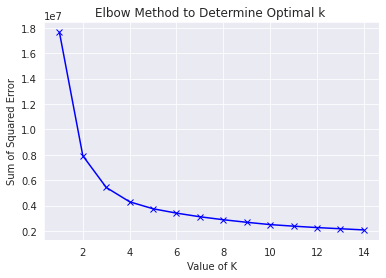

In [ ]:
# Plot the SSE result by cluster value (k)
plt.plot(range(1, 15), sum_of_squared_error, 'bx-') 
plt.xlabel("Value of K") 
plt.ylabel("Sum of Squared Error") 
plt.title("Elbow Method to Determine Optimal k ")
plt.show()

#### 3.1.3 Subset1 with Optimal k Value
Conduct k-means cluster with 3 cluster solution

In [ ]:
optimal_cluster = KMeans(n_clusters=3, init = 'k-means++', n_init=30, max_iter=300, random_state= 30).fit(subset1)
# Array for cluster assignment from the five cluster result
optimal_cluster_labels = optimal_cluster.labels_
# Centroids of the 3 clusters
optimal_cluster_center = optimal_cluster.cluster_centers_

In [ ]:
metrics.silhouette_score(subset1, optimal_cluster_labels, metric='euclidean')

0.3649742702551647

In [ ]:
metrics.calinski_harabasz_score(subset1, optimal_cluster_labels)

3527.0258507276008

#### 3.1.4 Subset 1 with reduced number of variables 
We explored the possibility of removing index that are not reliable indicators of the person's characterisics. WRITHOME is removed due to its low reliability according to the technical manual. However, the result did not appear to improve much on the performance. 

In [ ]:
subset1_1 = data_cleaned.loc[:, ["WRITWORK", "READHOME", "READWORK", "NUMHOME", "NUMWORK", "ICTHOME", "ICTWORK", "PVLIT1", "PVNUM1", "PVPSL1"]]

In [ ]:
subset1_1.head()

,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK,PVLIT1,PVNUM1,PVPSL1
0,3.690521,3.047967,2.780542,3.393321,4.361635,2.727385,3.564468,349.81872,354.55827,301.55177
1,1.741687,2.499774,2.234478,1.138663,2.027366,2.832901,3.308333,311.97580,327.27665,318.86517
2,0.762984,2.802664,2.154052,2.803284,1.848566,1.621030,1.153672,350.91657,285.83613,324.68964
3,2.985413,2.586127,2.032384,1.280105,2.206776,1.444296,3.440305,234.26233,229.90842,245.47580
4,2.847573,3.037285,2.169962,3.266308,0.582710,2.315158,1.316129,221.32517,195.09625,242.62990


In [ ]:
subset1_1_cluster = KMeans(n_clusters=3, init = 'k-means++', n_init=30, max_iter=300, random_state= 30).fit(subset1_1)
# Array for cluster assignment from the five cluster result
subset1_1_cluster_labels = subset1_1_cluster.labels_
# Centroids of the 3 clusters
subset1_1_cluster_center = subset1_1_cluster.cluster_centers_

In [ ]:
metrics.silhouette_score(subset1_1, subset1_1_cluster_labels, metric='euclidean')

0.3651055643570932

In [ ]:
metrics.calinski_harabasz_score(subset1_1, subset1_1_cluster_labels)

3528.466297360646

#### 3.1.4 Model 2 
Another way to explore the background variables and the assessment item score is to look at each cognitive domain seperately. We seperate the cognitive assessment scores and add only the numeracy set to the index. Then, we  continue with a 3 clusters k-mean analysis. 

##### Model 2 with Numeracy Scores

In [ ]:
np.r_[4:12,22:32] #use numpy to combine selected columns

array([ 4,  5,  6,  7,  8,  9, 10, 11, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31])

In [ ]:
subset2 = data_cleaned.iloc[:, np.r_[4:12,22:32]]

In [ ]:
subset2.describe()

,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK,PVNUM1,PVNUM2,PVNUM3,PVNUM4,PVNUM5,PVNUM6,PVNUM7,PVNUM8,PVNUM9,PVNUM10
count,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000
mean,2.446510,2.404889,2.747030,2.518369,2.484278,2.349938,2.415126,2.207846,279.675366,279.950478,280.468473,279.143220,279.573205,279.348508,278.749580,279.257964,280.343354,278.854036
std,0.846354,1.023700,0.771407,0.885965,0.790009,1.018320,0.832227,1.108656,47.936786,47.521127,47.287612,47.718376,48.296738,48.188308,46.963478,46.958215,47.933368,47.183059
min,-0.296028,0.056130,-0.304634,-0.558478,-0.508282,-0.090201,-0.776912,0.008985,65.125630,66.852180,89.417580,101.459550,82.521710,102.570390,44.329880,0.000000,20.759150,90.738710
25%,2.222770,1.741687,2.292098,1.970145,2.042943,1.700547,1.880038,1.308159,248.228625,248.298667,250.134465,247.868735,248.092455,248.254480,249.257332,247.932065,250.401657,247.442710
50%,2.628199,2.332981,2.690924,2.431995,2.504262,2.294747,2.418279,2.068596,281.880245,281.999590,282.344760,282.157770,281.963625,281.833495,279.846890,280.944825,282.242450,280.728715
75%,2.918247,2.985413,3.091591,2.941596,2.969251,3.004826,2.913816,2.933784,312.773867,312.289873,313.203477,311.827367,313.271832,312.311028,311.242285,311.873935,313.879507,312.093238
max,6.104219,5.799807,7.427246,7.020838,6.173661,6.049904,7.710159,5.463352,432.065500,438.637120,425.680560,429.042820,439.683620,436.090730,458.283340,424.231170,431.294160,445.026710


In [ ]:
model2 = KMeans(n_clusters=3, init = 'k-means++', n_init=30, max_iter=300, random_state= 30).fit(subset2)
# Array for cluster assignment from the five cluster result
model2_labels = model2.labels_
# Centroids of the 3 clusters
model2_center = model2.cluster_centers_

In [ ]:
metrics.silhouette_score(subset2, model2_labels, metric='euclidean')

0.3711011641615892

In [ ]:
metrics.calinski_harabasz_score(subset2, model2_labels)

3900.5617962597985

The two evaluation methods shows very little improvement comparing to the model 1 with subset data 1. 

##### Model 2 with Literacy Scores
The next model is to take the background variables and add the literacy scores.

In [ ]:
subset3 = data_cleaned.iloc[:, 4:22]

In [ ]:
subset3.head()

,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK,PVLIT1,PVLIT2,PVLIT3,PVLIT4,PVLIT5,PVLIT6,PVLIT7,PVLIT8,PVLIT9,PVLIT10
0,2.857830,3.690521,3.047967,2.780542,3.393321,4.361635,2.727385,3.564468,349.81872,346.28760,330.73240,278.23792,327.48548,362.36081,271.53633,350.56066,364.33575,322.09916
1,2.438870,1.741687,2.499774,2.234478,1.138663,2.027366,2.832901,3.308333,311.97580,333.80007,346.11162,351.24638,328.66602,388.05970,326.75586,350.29069,368.53784,341.61278
2,1.070335,0.762984,2.802664,2.154052,2.803284,1.848566,1.621030,1.153672,350.91657,286.53332,293.47318,310.50597,299.38403,294.27376,314.14011,309.38609,291.62154,281.58717
3,-0.296028,2.985413,2.586127,2.032384,1.280105,2.206776,1.444296,3.440305,234.26233,240.92852,232.55642,240.97180,237.46359,246.02384,256.84294,208.66588,222.23858,223.66660
4,3.346961,2.847573,3.037285,2.169962,3.266308,0.582710,2.315158,1.316129,221.32517,233.22331,238.33483,219.29122,214.33477,227.57778,216.53093,233.11585,212.39568,187.66165


In [ ]:
model2_2 = KMeans(n_clusters=3, init = 'k-means++', n_init=30, max_iter=300, random_state= 30).fit(subset3)
# Array for cluster assignment from the five cluster result
model2_2_labels = model2_2.labels_
# Centroids of the 3 clusters
model2_2_center = model2_2.cluster_centers_

In [ ]:
metrics.silhouette_score(subset3, model2_2_labels, metric='euclidean')

0.3598855875497177

In [ ]:
metrics.calinski_harabasz_score(subset3, model2_2_labels)

3825.6822244883106

In comparison to the model 2 (subset 2) with numeracy, the evaluation scores deteriorate in this model with the literacy set of scores

### 3.2 Review Results and Determine Characterisitcs of Clusters

##### 3.2.1 Model 1 with 3 Clusters
Here, we will review the cluster membership of model 1 based on the 3 cluster solutions with background variables & one set of the cognitive assessment scores (lit, num, psl). See Section 3.1.3 on the k-mean clustering analysis

In [ ]:
# Append cluster assignment as a column to the subset 1 dataframe 
subset1['cluster'] = optimal_cluster.fit_predict(subset1)

In [ ]:
subset1.head()

,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK,PVLIT1,PVNUM1,PVPSL1,cluster
0,2.857830,3.690521,3.047967,2.780542,3.393321,4.361635,2.727385,3.564468,349.81872,354.55827,301.55177,1
1,2.438870,1.741687,2.499774,2.234478,1.138663,2.027366,2.832901,3.308333,311.97580,327.27665,318.86517,1
2,1.070335,0.762984,2.802664,2.154052,2.803284,1.848566,1.621030,1.153672,350.91657,285.83613,324.68964,1
3,-0.296028,2.985413,2.586127,2.032384,1.280105,2.206776,1.444296,3.440305,234.26233,229.90842,245.47580,2
4,3.346961,2.847573,3.037285,2.169962,3.266308,0.582710,2.315158,1.316129,221.32517,195.09625,242.62990,2


In [ ]:
# Merge demographic variables with the subset 1 dataframe
result1 = pd.merge(bkg_set1, subset1, left_index= True, right_index= True)

In [ ]:
result1.head()

,GENDER_R,B_Q01A,C_D05,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK,PVLIT1,PVNUM1,PVPSL1,cluster
0,1.0,12.0,1.0,2.857830,3.690521,3.047967,2.780542,3.393321,4.361635,2.727385,3.564468,349.81872,354.55827,301.55177,1
1,2.0,12.0,1.0,2.438870,1.741687,2.499774,2.234478,1.138663,2.027366,2.832901,3.308333,311.97580,327.27665,318.86517,1
2,2.0,7.0,1.0,1.070335,0.762984,2.802664,2.154052,2.803284,1.848566,1.621030,1.153672,350.91657,285.83613,324.68964,1
3,1.0,7.0,1.0,-0.296028,2.985413,2.586127,2.032384,1.280105,2.206776,1.444296,3.440305,234.26233,229.90842,245.47580,2
4,2.0,3.0,1.0,3.346961,2.847573,3.037285,2.169962,3.266308,0.582710,2.315158,1.316129,221.32517,195.09625,242.62990,2


###### 3.2.1.1 Visualization of Model Cluster Results 

In [ ]:
sns.set(palette='Set1', color_codes=True)  # Set SNS plots aesthetic parameters in one step

In [ ]:
# Counts of Adults in each Cluster"
result1['cluster'].value_counts()

0    1361
1    1103
2     672
Name: cluster, dtype: int64

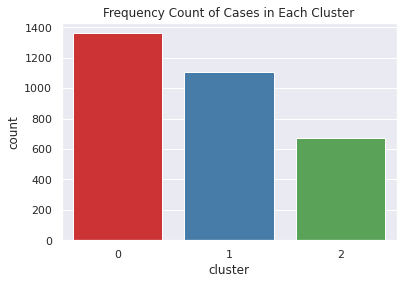

In [ ]:
# Counts of Adults in each Cluster - Plot
sns.countplot(x='cluster', data=result1)
plt.title("Frequency Count of Cases in Each Cluster")
plt.show()

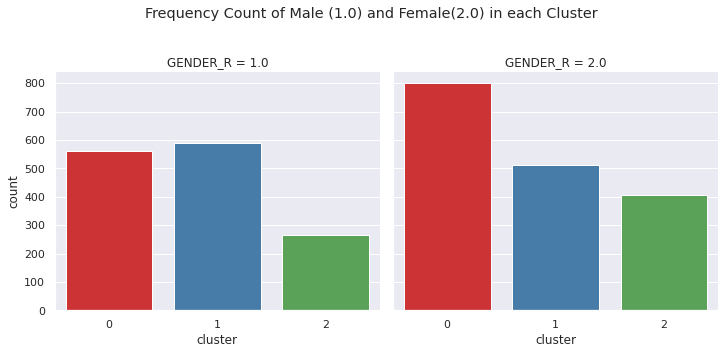

In [ ]:
# Categorical Plot of gender variable by categories
sns.catplot(x='cluster', col='GENDER_R', data=result1, kind='count')
# Gender codes: 1.0 Male, 2.0 Female
plt.subplots_adjust(top = 0.8)
plt.suptitle('Frequency Count of Male (1.0) and Female(2.0) in each Cluster')
plt.show()

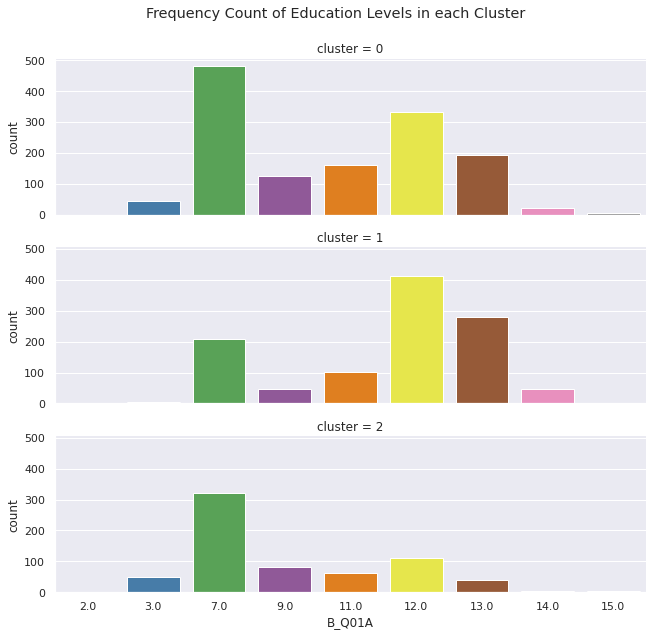

In [ ]:
# Categorial Plot of education level by clusters displayed in subplots
sns.catplot(x="B_Q01A", row="cluster", data=result1, kind="count", height = 3, aspect = 3)
plt.subplots_adjust(top = 0.9)
plt.suptitle('Frequency Count of Education Levels in each Cluster')
plt.show()

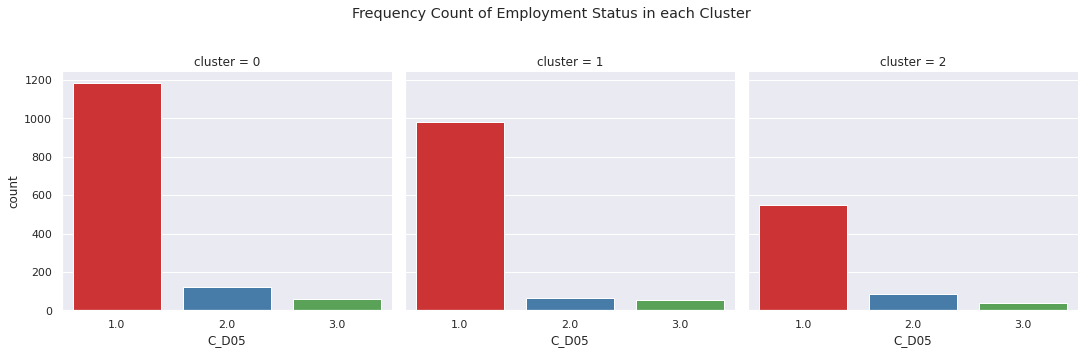

In [ ]:
# Categorical Plot of Employment Status by Cluster
sns.catplot(x='C_D05', col='cluster', data=result1, kind='count')
# Employment codes: 1.0 Employed, 2.0 Unemployed, 3.0 Out of Labor Force
plt.subplots_adjust(top = 0.8)
plt.suptitle('Frequency Count of Employment Status in each Cluster')
plt.show()

Scatterplot of clusters by the index variables

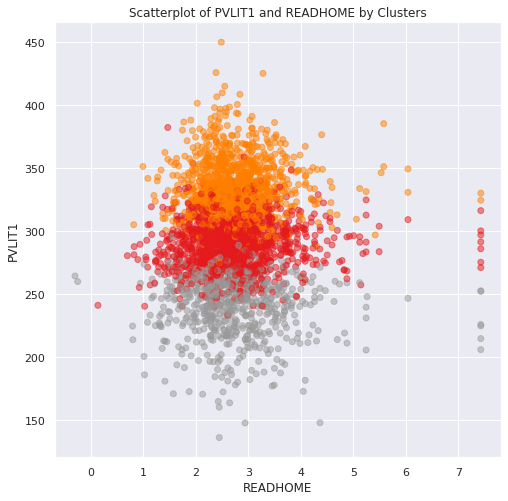

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(result1['READHOME'], result1['PVLIT1'], c = result1['cluster'], cmap ='Set1', alpha = 0.5)
plt.title('Scatterplot of PVLIT1 and READHOME by Clusters')
plt.xlabel('READHOME')
plt.ylabel('PVLIT1')
plt.show()

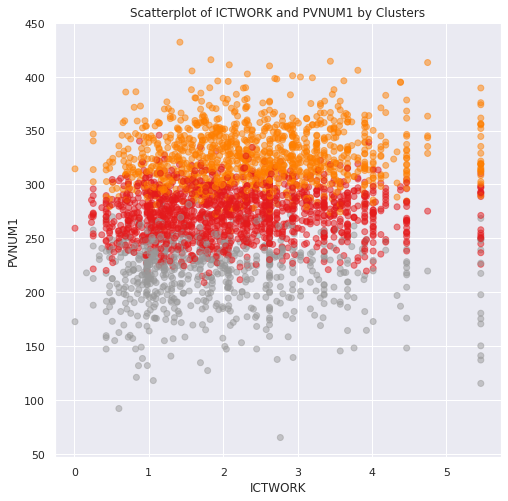

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(result1['ICTWORK'], result1['PVNUM1'], c = result1['cluster'], cmap ='Set1', alpha = 0.5)
plt.title('Scatterplot of ICTWORK and PVNUM1 by Clusters')
plt.xlabel('ICTWORK')
plt.ylabel('PVNUM1')
plt.show()

3D scatter plot of the congnitive assessment scores: literacy, numeracy, and problem solving in technology-rich environment. 

<Figure size 432x288 with 0 Axes>

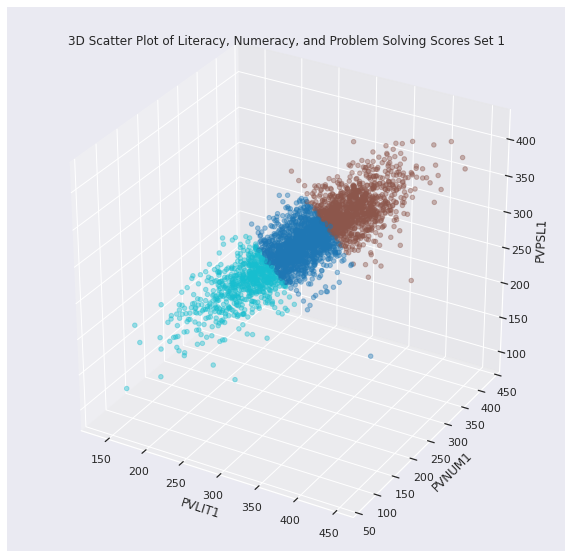

In [ ]:
fig=plt.figure()
plt.figure(figsize=(10, 10))
ax = plt.axes(projection = "3d")
ax.scatter3D(result1['PVLIT1'], result1['PVNUM1'], result1['PVPSL1'], c = result1['cluster'], cmap='tab10', alpha = 0.4)
ax.set_xlabel('PVLIT1')
ax.set_ylabel('PVNUM1')
ax.set_zlabel('PVPSL1')
plt.title('3D Scatter Plot of Literacy, Numeracy, and Problem Solving Scores Set 1')
plt.show()

<Figure size 432x288 with 0 Axes>

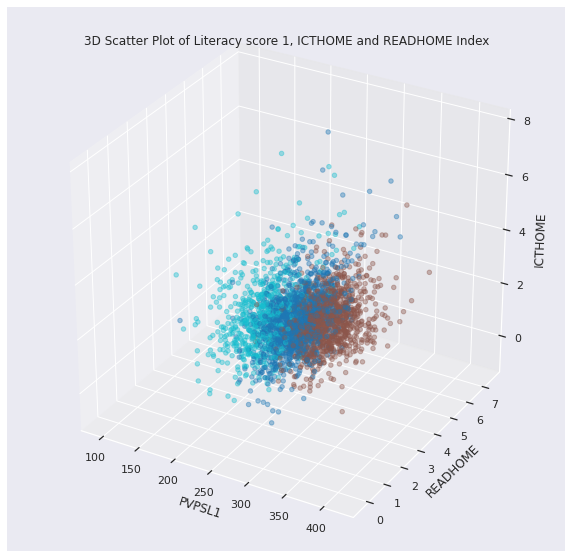

In [ ]:
fig=plt.figure()
plt.figure(figsize=(10, 10))
ax = plt.axes(projection = "3d")
ax.scatter3D(result1['PVPSL1'], result1['READHOME'], result1['ICTHOME'], c = result1['cluster'], cmap='tab10', alpha = 0.4)
ax.set_xlabel('PVPSL1')
ax.set_ylabel('READHOME')
ax.set_zlabel('ICTHOME')
plt.title('3D Scatter Plot of Literacy score 1, ICTHOME and READHOME Index')
plt.show()

###### 3.2.1.2 Summary Table of Each Cluster

In [ ]:
# Create a dataframe for each cluster in result 1
cluster_0 = result1[result1['cluster'] == 0]
cluster_1 = result1[result1['cluster'] == 1]
cluster_2 = result1[result1['cluster'] == 2]

In [ ]:
cluster_0.describe()  # Descriptive Summary of Cluster 0

,GENDER_R,B_Q01A,C_D05,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK,PVLIT1,PVNUM1,PVPSL1,cluster
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.0
mean,1.587803,9.717855,1.172667,2.416984,2.406181,2.733792,2.501255,2.429857,2.328670,2.360904,2.155609,290.107357,272.757974,280.197449,0.0
std,0.492411,2.736687,0.477758,0.848858,1.017646,0.791261,0.897719,0.794799,0.998890,0.832508,1.092976,18.796208,21.610250,23.234778,0.0
min,1.000000,3.000000,1.000000,-0.296028,0.056130,0.132395,-0.558478,-0.508282,-0.090201,-0.776912,0.008985,233.215480,208.946870,150.938380,0.0
25%,1.000000,7.000000,1.000000,2.222770,1.741687,2.261764,1.929181,1.994357,1.694874,1.825333,1.261349,276.757680,257.157620,264.440340,0.0
50%,2.000000,11.000000,1.000000,2.574343,2.332981,2.683103,2.398441,2.450328,2.288888,2.365858,2.009289,290.288650,273.188390,280.849590,0.0
75%,2.000000,12.000000,1.000000,2.912227,2.985413,3.086316,2.970811,2.892055,2.971576,2.836509,2.874441,302.650440,288.196840,296.016180,0.0
max,2.000000,15.000000,3.000000,6.104219,5.799807,7.427246,7.020838,6.173661,6.049904,7.710159,5.463352,382.044420,345.684440,352.778850,0.0


In [ ]:
cluster_1.describe()  # Descriptive Summary of Cluster 1

,GENDER_R,B_Q01A,C_D05,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK,PVLIT1,PVNUM1,PVPSL1,cluster
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.0
mean,1.465095,11.123300,1.159565,2.548006,2.422540,2.765925,2.514079,2.648549,2.447717,2.629361,2.454569,334.803454,326.819750,321.395942,1.0
std,0.499006,2.301115,0.485653,0.690947,0.900926,0.652946,0.713007,0.709111,1.017729,0.704001,1.073707,22.857224,25.777388,24.924016,0.0
min,1.000000,3.000000,1.000000,-0.296028,0.056130,0.814411,0.370628,-0.508282,-0.090201,0.063663,0.008985,272.113820,256.502960,223.617610,1.0
25%,1.000000,11.000000,1.000000,2.389063,1.907905,2.375849,2.052292,2.247686,1.795182,2.200850,1.682578,318.805110,308.486250,305.548210,1.0
50%,1.000000,12.000000,1.000000,2.670381,2.375960,2.716843,2.477684,2.724855,2.366714,2.627961,2.378021,332.898380,323.304390,320.107370,1.0
75%,2.000000,13.000000,1.000000,2.912227,2.945252,3.078915,2.904939,3.074760,3.154758,3.052823,3.173038,348.833750,343.683600,336.759750,1.0
max,2.000000,14.000000,3.000000,6.104219,5.799807,7.427246,7.020838,6.173661,6.049904,5.089209,5.463352,449.728540,432.065500,416.480890,1.0


In [ ]:
cluster_2.describe()  # Descriptive Summary of Cluster 2

,GENDER_R,B_Q01A,C_D05,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK,PVLIT1,PVNUM1,PVPSL1,cluster
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.0
mean,1.605655,8.540179,1.236607,2.339717,2.373301,2.742829,2.560073,2.324870,2.232519,2.173301,1.908676,240.687904,216.303809,233.907680,2.0
std,0.489074,2.756625,0.536839,1.035417,1.209416,0.900062,1.093897,0.856706,1.044531,0.936619,1.110304,24.789945,30.428830,28.172724,0.0
min,1.000000,2.000000,1.000000,-0.296028,0.056130,-0.304634,-0.156744,-0.508282,-0.090201,-0.776912,0.008985,135.991680,65.125630,93.901960,2.0
25%,1.000000,7.000000,1.000000,1.685187,1.548409,2.244191,1.881590,1.775165,1.546843,1.505313,1.036862,225.973540,198.700277,218.250622,2.0
50%,2.000000,7.000000,1.000000,2.574343,2.232061,2.662868,2.359446,2.394702,2.207696,2.118882,1.683030,244.778165,221.708870,236.878520,2.0
75%,2.000000,11.000000,1.000000,2.949459,3.184111,3.153228,2.962860,2.846097,2.913686,2.686997,2.624086,258.546568,237.388647,252.840555,2.0
max,2.000000,15.000000,3.000000,6.104219,5.799807,7.427246,7.020838,6.173661,6.049904,7.710159,5.463352,324.844260,288.905530,307.378970,2.0


#### 3.2.2 Model 2 with Numeracy Cluster Result

In [ ]:
# Append cluster assignment as a column to the subset 1 dataframe 
subset2.insert(18, 'cluster', value = (model2.fit_predict(subset2))  )

In [ ]:
subset2.head()

,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK,PVNUM1,PVNUM2,PVNUM3,PVNUM4,PVNUM5,PVNUM6,PVNUM7,PVNUM8,PVNUM9,PVNUM10,cluster
0,2.857830,3.690521,3.047967,2.780542,3.393321,4.361635,2.727385,3.564468,354.55827,331.13920,359.91198,326.94124,355.71689,362.47545,299.25932,364.43998,378.52308,327.03974,1
1,2.438870,1.741687,2.499774,2.234478,1.138663,2.027366,2.832901,3.308333,327.27665,337.01325,325.27632,358.91713,290.63060,380.61383,325.01897,353.37299,347.79402,348.56236,1
2,1.070335,0.762984,2.802664,2.154052,2.803284,1.848566,1.621030,1.153672,285.83613,308.74445,309.02457,305.58945,315.07096,284.79936,303.60327,286.46194,274.41386,287.10434,2
3,-0.296028,2.985413,2.586127,2.032384,1.280105,2.206776,1.444296,3.440305,229.90842,221.82773,223.06117,216.20949,246.49719,234.80651,229.48414,206.52143,220.15503,210.38608,0
4,3.346961,2.847573,3.037285,2.169962,3.266308,0.582710,2.315158,1.316129,195.09625,190.21328,215.29848,179.64235,193.62778,204.11288,191.13633,211.91665,189.64415,164.53685,0


In [ ]:
# Merge demographic variables with the subset 2 dataframe
result2 = pd.merge(bkg_set1, subset2, left_index= True, right_index= True)

In [ ]:
result2.head()

,GENDER_R,B_Q01A,C_D05,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK,PVNUM1,PVNUM2,PVNUM3,PVNUM4,PVNUM5,PVNUM6,PVNUM7,PVNUM8,PVNUM9,PVNUM10,cluster
0,1.0,12.0,1.0,2.857830,3.690521,3.047967,2.780542,3.393321,4.361635,2.727385,3.564468,354.55827,331.13920,359.91198,326.94124,355.71689,362.47545,299.25932,364.43998,378.52308,327.03974,1
1,2.0,12.0,1.0,2.438870,1.741687,2.499774,2.234478,1.138663,2.027366,2.832901,3.308333,327.27665,337.01325,325.27632,358.91713,290.63060,380.61383,325.01897,353.37299,347.79402,348.56236,1
2,2.0,7.0,1.0,1.070335,0.762984,2.802664,2.154052,2.803284,1.848566,1.621030,1.153672,285.83613,308.74445,309.02457,305.58945,315.07096,284.79936,303.60327,286.46194,274.41386,287.10434,2
3,1.0,7.0,1.0,-0.296028,2.985413,2.586127,2.032384,1.280105,2.206776,1.444296,3.440305,229.90842,221.82773,223.06117,216.20949,246.49719,234.80651,229.48414,206.52143,220.15503,210.38608,0
4,2.0,3.0,1.0,3.346961,2.847573,3.037285,2.169962,3.266308,0.582710,2.315158,1.316129,195.09625,190.21328,215.29848,179.64235,193.62778,204.11288,191.13633,211.91665,189.64415,164.53685,0


##### 3.2.2.1 Visualization of Model 2 Numeracy Cluster Result

In [ ]:
# Counts of Adults in each Cluster"
result2['cluster'].value_counts()

2    1430
1    1008
0     698
Name: cluster, dtype: int64

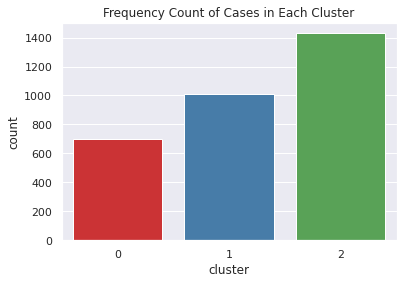

In [ ]:
# Counts of Adults in each Cluster - Plot
sns.countplot(x='cluster', data=result2)
plt.title("Frequency Count of Cases in Each Cluster")
plt.show()

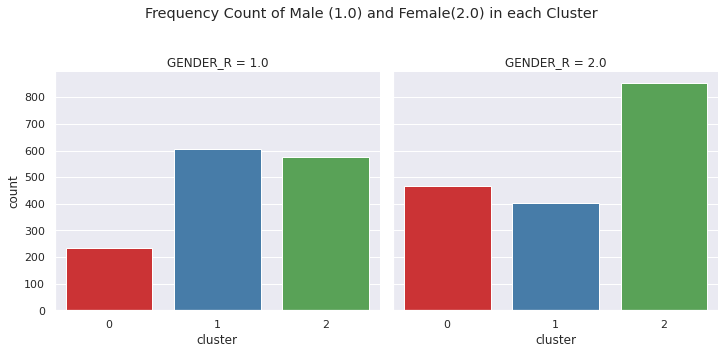

In [ ]:
# Categorical Plot of gender variable by categories
sns.catplot(x='cluster', col='GENDER_R', data=result2, kind='count')
plt.subplots_adjust(top = 0.8)
plt.suptitle('Frequency Count of Male (1.0) and Female(2.0) in each Cluster')
plt.show()

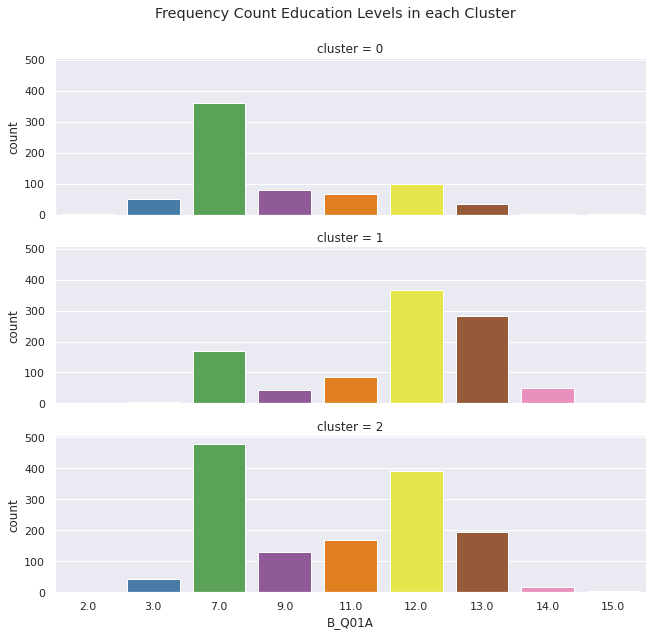

In [ ]:
# Categorial Plot of education level by clusters displayed in subplots
sns.catplot(x="B_Q01A", row="cluster", data=result2, kind="count", height = 3, aspect = 3)
plt.subplots_adjust(top = 0.9)
plt.suptitle('Frequency Count Education Levels in each Cluster')
plt.show()

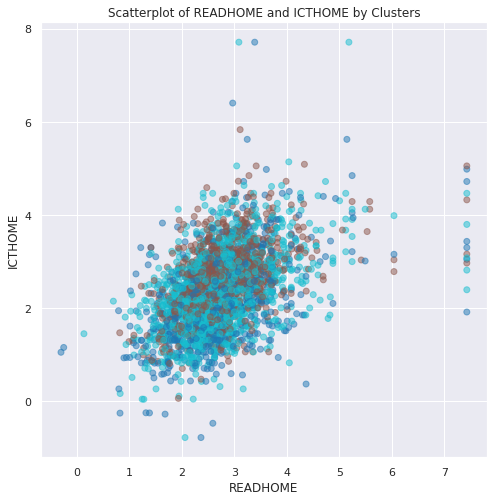

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(result2['READHOME'], result2['ICTHOME'], c = result2['cluster'], cmap ='tab10', alpha = 0.5)
plt.title('Scatterplot of READHOME and ICTHOME by Clusters')
plt.xlabel('READHOME')
plt.ylabel('ICTHOME')
plt.show()

<Figure size 432x288 with 0 Axes>

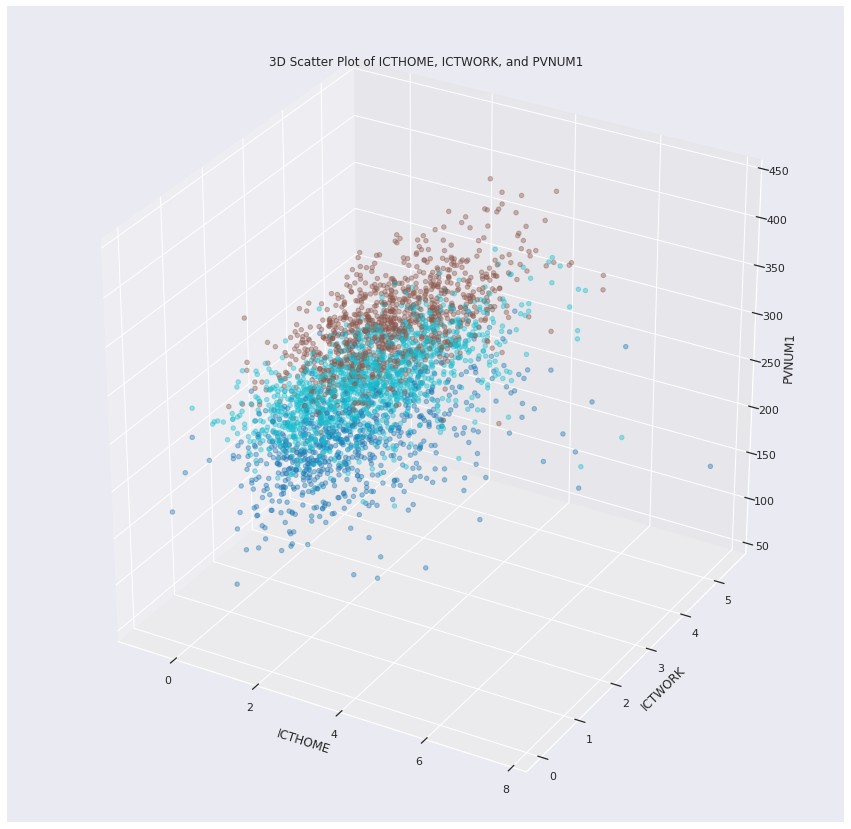

In [ ]:
fig=plt.figure()
plt.figure(figsize=(15, 15))
ax = plt.axes(projection = "3d")
ax.scatter3D(result2['ICTHOME'], result2['ICTWORK'], result2['PVNUM1'], c = result2['cluster'], cmap='tab10', alpha = 0.4)
ax.set_xlabel('ICTHOME')
ax.set_ylabel('ICTWORK')
ax.set_zlabel('PVNUM1')
plt.title("3D Scatter Plot of ICTHOME, ICTWORK, and PVNUM1")
plt.show()

##### 3.2.2.2 Summary Table of Each Cluster

In [ ]:
# Create a dataframe for each cluster in result 2
cluster0 = result2[result2['cluster'] == 0]
cluster1 = result2[result2['cluster'] == 1]
cluster2 = result2[result2['cluster'] == 2]

In [ ]:
cluster0.describe()  # Descriptive Summary of Cluster 0

,GENDER_R,B_Q01A,C_D05,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK,PVNUM1,PVNUM2,PVNUM3,PVNUM4,PVNUM5,PVNUM6,PVNUM7,PVNUM8,PVNUM9,PVNUM10,cluster
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.0
mean,1.666189,8.343840,1.244986,2.352101,2.384642,2.737687,2.497253,2.315958,2.187540,2.189193,1.943120,217.101128,218.562687,219.208703,216.264957,216.636780,215.934453,218.105588,218.773184,217.629831,216.818490,0.0
std,0.471911,2.640453,0.539817,1.020433,1.207084,0.895563,1.059278,0.845636,1.050063,0.939771,1.122946,30.040537,29.400922,29.324995,29.956810,29.373175,29.300913,29.590313,29.324146,31.077918,28.621714,0.0
min,1.000000,2.000000,1.000000,-0.296028,0.056130,-0.304634,-0.156744,-0.508282,-0.090201,-0.776912,0.008985,65.125630,66.852180,89.417580,101.459550,82.521710,102.570390,44.329880,0.000000,20.759150,90.738710,0.0
25%,1.000000,7.000000,1.000000,1.685187,1.568359,2.243211,1.832917,1.773757,1.499018,1.565626,1.051295,199.577425,201.055982,202.803382,198.660055,201.218200,200.558463,201.204975,205.114840,201.930468,201.179350,0.0
50%,2.000000,7.000000,1.000000,2.574343,2.232061,2.699438,2.323698,2.374106,2.141581,2.122979,1.719739,223.039120,222.560270,221.379335,220.969030,221.015295,220.277610,221.568675,221.679990,221.922155,220.229350,0.0
75%,2.000000,11.000000,1.000000,2.949319,3.184111,3.165662,2.897852,2.817769,2.844549,2.734587,2.624086,237.309745,239.304882,239.264335,236.742845,236.537598,236.810262,238.359595,237.356122,239.073428,235.833237,0.0
max,2.000000,15.000000,3.000000,6.104219,5.799807,7.427246,7.020838,6.173661,6.049904,7.710159,5.463352,304.965530,299.689840,316.033310,311.425060,288.439650,282.819280,287.616890,297.769950,306.774950,300.222960,0.0


In [ ]:
cluster1.describe()  # Descriptive Summary of Cluster 1

,GENDER_R,B_Q01A,C_D05,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK,PVNUM1,PVNUM2,PVNUM3,PVNUM4,PVNUM5,PVNUM6,PVNUM7,PVNUM8,PVNUM9,PVNUM10,cluster
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.0
mean,1.398810,11.284722,1.130952,2.546462,2.417856,2.800618,2.577003,2.688202,2.533574,2.649208,2.490167,328.683220,328.575803,328.609495,327.084861,328.850054,328.571074,326.409761,327.351913,328.528570,326.700342,1.0
std,0.489897,2.252944,0.450878,0.682589,0.898465,0.691807,0.717121,0.720573,1.018154,0.706508,1.070657,26.214925,26.233635,26.406035,26.265116,26.539607,26.878113,26.703457,25.598925,26.514876,25.881602,0.0
min,1.000000,3.000000,1.000000,-0.296028,0.056130,0.814411,0.413016,-0.508282,-0.090201,0.063663,0.008985,241.664990,252.668990,245.107210,245.723560,257.194760,244.013790,249.034100,230.442810,246.938900,231.507240,1.0
25%,1.000000,11.000000,1.000000,2.222770,1.907905,2.388451,2.101213,2.292558,1.861007,2.230760,1.710897,311.009977,310.056530,310.092640,309.039803,310.448000,310.617770,308.358702,309.435560,310.182285,309.629543,1.0
50%,1.000000,12.000000,1.000000,2.670381,2.375960,2.745251,2.538049,2.773981,2.413072,2.651296,2.393284,326.281765,327.339015,325.847370,325.049100,326.099615,325.989605,323.405230,325.261590,326.946300,324.077570,1.0
75%,2.000000,13.000000,1.000000,2.899548,2.867870,3.104925,2.964215,3.109581,3.296536,3.071988,3.258288,345.059918,343.264172,343.577993,342.941640,343.530843,343.654790,343.589830,343.083343,344.853195,341.110940,1.0
max,2.000000,15.000000,3.000000,6.104219,5.799807,7.427246,7.020838,6.173661,6.049904,5.833296,5.463352,432.065500,438.637120,425.680560,429.042820,439.683620,436.090730,458.283340,424.231170,431.294160,445.026710,1.0


In [ ]:
cluster2.describe()  # Descriptive Summary of Cluster 2

,GENDER_R,B_Q01A,C_D05,WRITHOME,WRITWORK,READHOME,READWORK,NUMHOME,NUMWORK,ICTHOME,ICTWORK,PVNUM1,PVNUM2,PVNUM3,PVNUM4,PVNUM5,PVNUM6,PVNUM7,PVNUM8,PVNUM9,PVNUM10,cluster
count,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.0
mean,1.596503,9.814685,1.186713,2.422136,2.405632,2.713818,2.487345,2.422693,2.299762,2.360402,2.138054,275.673198,275.638835,276.435723,276.041019,275.558214,275.604916,274.755204,274.880116,276.989048,275.407696,2.0
std,0.490770,2.704724,0.497121,0.850448,1.009557,0.757535,0.899293,0.779457,0.983591,0.818755,1.085500,22.228316,22.814741,22.600395,22.573025,23.160413,21.890179,22.236653,22.773915,22.448897,22.492953,0.0
min,1.000000,2.000000,1.000000,-0.296028,0.056130,0.132395,-0.558478,-0.508282,-0.090201,-0.776912,0.008985,190.644510,204.609450,175.856170,211.762490,194.747600,208.889680,192.848680,205.606230,190.067520,198.298980,2.0
25%,1.000000,7.000000,1.000000,2.222770,1.741687,2.260714,1.915140,1.994357,1.667057,1.816931,1.245554,260.058765,259.478158,260.395320,260.077395,259.631847,260.446520,259.551335,259.580248,261.428450,260.162857,2.0
50%,2.000000,11.000000,1.000000,2.574343,2.332981,2.658770,2.392789,2.450328,2.271220,2.370658,2.022433,276.480430,275.274180,276.948675,276.064250,275.962740,276.012410,274.812545,274.492510,276.869115,275.596055,2.0
75%,2.000000,12.000000,1.000000,2.918247,2.985413,3.053678,2.932552,2.849566,2.971576,2.836509,2.810439,291.144602,291.383928,291.432315,291.735707,291.152888,291.269380,290.782820,290.580312,292.087580,291.406952,2.0
max,2.000000,15.000000,3.000000,6.104219,5.799807,7.427246,7.020838,6.173661,6.049904,7.710159,5.463352,351.486780,352.326850,360.939040,344.060530,357.124510,355.431870,350.644020,349.358580,356.579460,358.102650,2.0


#### Project Summary
1. This work was inspired by a study with the Italian PIAAC data and we have taken a data mining approach through the CRISP-DM process. 
2.	Our research focus on identifying the subgroups of U.S. adults in terms of their literacy, numeracy, and ICT skills assessed in the PIAAC study. 
3.	A second aim of this exploratory work is to develop models that can be use for future analytics 
4.	There are three demographic variables and 8 index of skills variables and three sets of cognitive assessment scores. 
5.	For methodology and tools, we used kmean algorithm in scikitlearn to partition the data and evaluated it with 2 methods. 
6.	After conducting the elbow method, it suggested an optimal value of 3 clusters.  
7.	Then, we re-run the analysis with 3 clusters and tried different combination of variables. 
##### Results and Next Step:
1. We can see that the membership are different in the different models.  
2. For Model 1,  we used the cognitive assessment scores to view the clusters, it is displayed in an oval shape. For Model 2, we plotted the ICT index at home and at work with the numeracy scores. The clusters are overlaying each other on the three-dimensional space.  
3.	This tells us that the variables may not give us information to find clearly separated clusters. There could be noise issue and other techniques should be considered, such as dimension reduction or other clustering algorithm.

## References
- Aldenderfer, M. S., & Blashfield, R. K. (1984). Cluster Analysis (Sage University Paper Quantitative Series 44). Sage Publications, Inc.
- Everitt, B.S. Landau, S., & Leese, M. (2001). Cluster Analysis (4th ed.). Oxford University Press Inc. 
- Salvatori, E., Gabrielli, L., Giannotti, F., & Pedreschi, D. (2017). A data driven approach for evaluating foundation skills of adults [Paper presentation](https://www.aicanet.it/documents/10776/1476921/Didamatica17_paper_23.pdf/990530f6-0c5a-4bec-b713-000c99313caa). Didamatica 2017, Rome, Italy. 


Contact Us: caryjim@my.unt.edu or omaraljawfy@gmail.com